In [2]:
import sys
print(sys.version)

3.13.2 (main, Feb  5 2025, 08:05:21) [GCC 14.2.1 20250128]


In [3]:
!pip install -U qiskit-ibm-runtime
!pip install -U --no-cache-dir qiskit
!pip install -U qiskit-aer
!pip install -U pylatexenc

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.
error: externally-managed-environment

× This environment is externally managed
╰

# Transformada de Fourier

Notebook para para entender el algoritmo de la Transformada de Fourier.
 Empezamos implementando el algoritmo de la **FFT** (**Fast Fourier Transform**) para encontrar el espectro de señales discretas de valores reales. Posteriormente implementamos la **QFT** (**Quantum Fourier Transform**) y su inversa para realizar conversiones entre señales de valores complejos y su descomposicion de Fourier.

Cargamos inicialmente las bibliotecas que vamos a necesitar.

In [4]:
import numpy as np
import math

## Import Qiskit
##from qiskit import QuantumCircuit, QuantumRegister
##from qiskit import Aer, transpile
##from qiskit.providers.aer import Aer, AerSimulator
##from qiskit.providers.fake_provider import FakeVigo

##from qiskit.visualization import array_to_latex
##from qiskit.tools.visualization import plot_histogram, plot_state_city
##import qiskit.quantum_info as qi

# nuevo Import Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings("ignore")

from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator

from qiskit.visualization import plot_histogram, plot_state_city, array_to_latex # plot_histogram is already imported earlier in the code, you can remove it from here if you want
import qiskit.quantum_info as qi
from qiskit.providers.fake_provider import GenericBackendV2
#from qiskit.providers.fake_provider import FakeLima



## Algoritmo de la Transformada de Fourier discreta (FFT)

La transformada de Fourier es una transformación que permite obtener el espectro de frecuencias de una señal, dicho de otra forma su periodicidad.

Se usa de forma amplia en ciencia y en ingeniería para análisis de datos y señales. Para su cálculo se utiliza el algoritmo **FFT** (**Fast Fourier Transform**) que es un algoritmo numÉrico que permite calcular de forma muy eficiente el espectro de frecuencias de una señal muestreada.

El algoritmo de implementacion de la **FFT** puede utilizarse directamente de las bibliotecas de `numpy` con la operacion [Discrete Fourier Transform](https://numpy.org/doc/stable/reference/routines.fft.html)

#### EJERCICIO

Descarga el fichero de [datos](https://drive.google.com/file/d/19Y1FsXA_T_LCXrNmSw2Ni-m-jNL4-WX1/view) que recoge el muestreo de una [señal sonora](https://drive.google.com/file/d/1oDiZ7s-5CQ5ceIM1Za1BXxPnE4LcpCNn/view) y guardalo en el directorio de trabajo.

Crea un programa Python que realice los siguientes pasos:

1) Lee el archivo csv desde una URL "waveform.csv" que tiene el siguiente formato: número1, número2. Donde número1 son datos de tiempo y número2 son datos de señal
2) Calcula la FFT (Transformada Rápida de Fourier) de los datos en el archivo
3) Calcula la frecuencia con el máximo en la FFT
4) Visualiza los datos obtenidos de la FFT con el analisis espectral de la señal

4) Calcula la frecuencia con el máximo en la FFT

In [5]:
# importa biblioteca datos
import pandas as pd
#importa biblioteca numpy
import numpy as np
#importa biblioteca para crear gráficos y visualizaciones en Python
import matplotlib.pyplot as plt
#Importa el módulo time, que permite trabajar con funciones de temporización
import time

In [6]:
# Paso 1: Lee fichero CSV de la ruta que le pongamos
#url = "waveform.csv"
url ="https://drive.google.com/uc?id=19Y1FsXA_T_LCXrNmSw2Ni-m-jNL4-WX1"
df = pd.read_csv(url, header=None, names=["time", "signal"])

In [7]:
# Paso 2: Calcula la FFT de la estructura de datos
signal_data = df["signal"].values
fft_result = np.fft.fft(signal_data) ### fft_result es un array de números complejos que representan las amplitudes y fases de las diferentes frecuencias en la señal
fft_freq = np.fft.fftfreq(len(fft_result), d=(df["time"].iloc[1] - df["time"].iloc[0])) ##obtención de las frecuencias asociadas a los valores de la FFT. Devuelve matriz con valores de frecuencia positiva y negativa
tiempo_total=(df["time"].values[1] - df["time"].values[0])*len(df["time"].values)
print('tiempo total',tiempo_total) ##duración total de la señal en segundos como intervalo de muestreo x número de muestras

tiempo total 0.8820000000000001


In [8]:
# Paso 3: Calcula la frecuencia con la máxima amplitud en esta FFT
max_freq_index = np.argmax(np.abs(fft_result))
max_freq = fft_freq[max_freq_index] #*tiempo_total
print(f"La frecuencia con la máxima amplitud es: {max_freq} Hz")
print(max_freq_index)

La frecuencia con la máxima amplitud es: 295.91836734693874 Hz
261


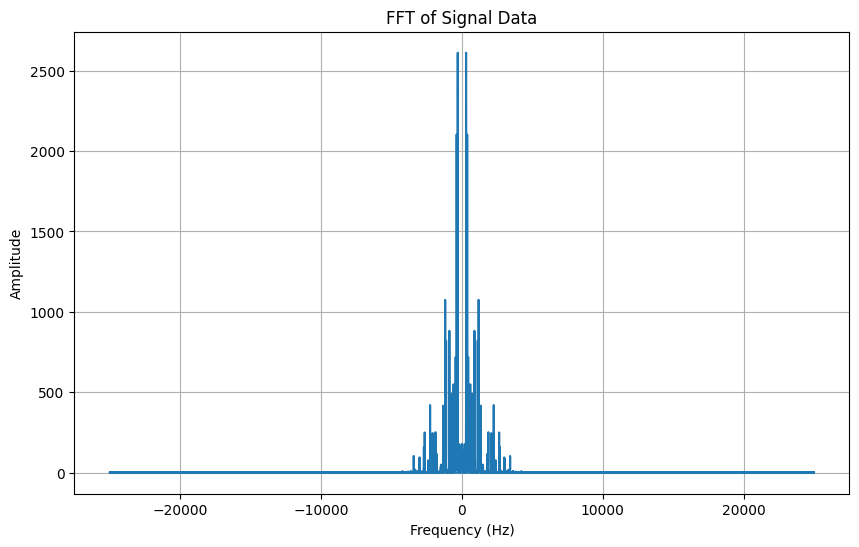

In [9]:
# Paso 4: Muestra la gráfica de la FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freq, np.abs(fft_result)) #modificar para ver de [0:1000]
plt.title('FFT of Signal Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

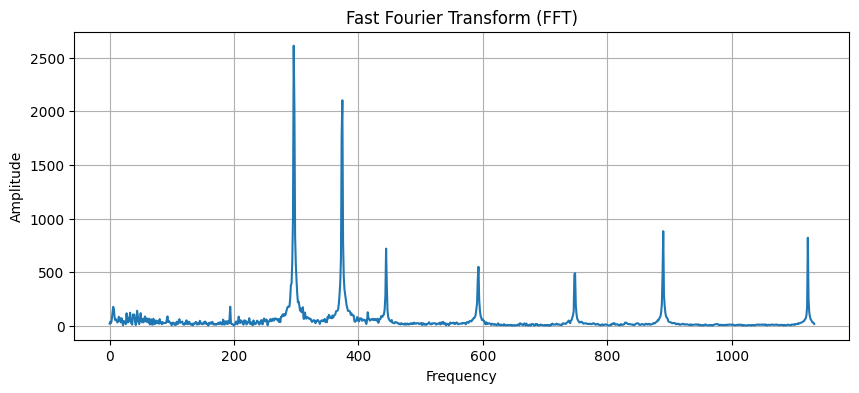

In [10]:
# Paso 5: Haz zoom y me muestras las primeras 1000 muestras
plt.figure(figsize=(10, 4))
plt.plot(fft_freq[0:1000], np.abs(fft_result[0:1000]))
plt.title('Fast Fourier Transform (FFT)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Algoritmo de la Transformada de Fourier Cuantica (QFT)

## Introducción

La QFT es la versión cuántica de la Transformada Discreta de Fourier (DFT) utilizada en la computación clásica, donde se aplica principalmente en teoría de señales para analizar el espectro y descomponer una señal en sus componentes de frecuencia.

En computacion clásica la DFT se define como una transformación que actua sobre un vector $(a_0, ..., a_{N-1})$ y lo transforma en otro vector $(\phi_0, ..., \phi_{N-1})$ por medio de los siguientes cálculos:


$$\phi_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}a_j\omega_N^{jk}$$

donde $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Nótese que los valores de $(a_0, ..., a_{N-1})$ son tipicamente una sucesión de valores reales y la DFT obtiene unos valores transformados $(\phi_0, ..., \phi_{N-1})$ que son números complejos.


En computacion cuántica la QFT se define como una transformacion de un estado cuántico $\vert \psi \rangle = \sum_{j=0}^{N-1} a_j \vert j \rangle$ que se transforma en otro estado cuántico $\vert \phi\rangle = \sum_{k=0}^{N-1} \phi_k \vert k \rangle$ por medio de los siguientes cálculos:


$$\phi_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}a_j\omega_N^{jk}$$


con $\omega_N^{jk}$ definida como anteriormente.


Y esto podemos expresarlo como sigue para un estado de la base:

$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$$

Es importante notar que esta transformación **modifica únicamente las amplitudes**, introduciendo fases en los coeficientes del estado cuántico.


Expresando la QFT en la forma de composicion de qubits unitarios tenemos que:

$$
QFT(\vert j_{n-1}...j_1j_0\rangle)= \frac{1}{\sqrt{N}}
(\vert 0 \rangle + e^{2 \pi i \frac{j_0}{2}} \vert 1 \rangle )\otimes
(\vert 0 \rangle + e^{2 \pi i (\frac{j_1}{2}+\frac{j_0}{2^2})} \vert 1 \rangle)\otimes ... \otimes
(\vert 0 \rangle + e^{2 \pi i (\frac{j_{n-1}}{2}+...+\frac{j_1}{2^{n-1}}+\frac{j_0}{2^n})} \vert 1 \rangle)$$




La formula anterior expresa la QFT para estados de $n$ qbits con $N=2^n$.

Cabe destacar que el último qubit depende de los valores de todos los qubits anteriores, mientras que cada qubit sucesivo depende de un menor número de qubits. Esto tiene importantes implicaciones en la implementación en hardware cuántico, ya que la conectividad entre qubits es limitada y puede afectar la eficiencia de la ejecución del circuito.

## Intuición

La QFT transforma un estado cuántico en la base Z a otro estado en la base X, funcionando como un cambio de base en el espacio de coordenadas de los vectores de estado:

$$
|\text{Estado en la base Z }\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{Estado en la base de Fourier}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$

Los estados en la base de Fourier se denotan con (~)

## QFT para 4 qubits

La QFT para un sistema de 4 qubits se puede expresar en términos de la composición de operaciones unitarias de la siguiente manera:

$$
QFT(\vert j_{n-1}j_1...j_0\rangle)= \frac{1}{\sqrt{N}}
(\vert 0 \rangle + e^{2 \pi i \frac{j_0}{2}} \vert 1 \rangle )\otimes
(\vert 0 \rangle + e^{2 \pi i (\frac{j_0}{2^2}+\frac{j_1}{2})} \vert 1 \rangle)\otimes
(\vert 0 \rangle + e^{2 \pi i  (\frac{j_0}{2^3}+\frac{j_1}{2^{2}}+\frac{j_{2}}{2})}] \vert 1 \rangle)\otimes
(\vert 0 \rangle + e^{2 \pi i  (\frac{j_0}{2^4}+\frac{j_1}{2^{3}}+\frac{j_{2}}{2^2}+\frac{j_{3}}{2})}] \vert 1 \rangle)$$

### EJERCICIO 1

Implementa la QFT para 4 qbits

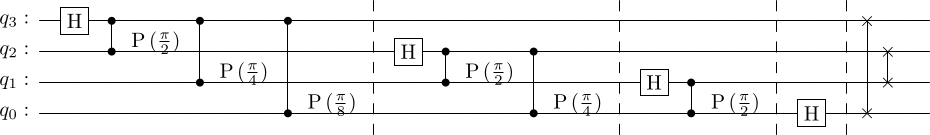

In [11]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize

# Creamos un circuito cuántico con 4 qubits
qreg = QuantumRegister(4, name='q')
circ = QuantumCircuit(qreg)

# Definimos la transformada cuántica de Fourier para 4 qubits
def qft_4(circuit):
    circuit.h(3)
    circuit.cp(np.pi / 2, 2, 3)
    circuit.cp(np.pi / 4, 1, 3)
    circuit.cp(np.pi / 8, 0, 3)
    circuit.barrier()
    
    circuit.h(2)
    circuit.cp(np.pi / 2, 1, 2)
    circuit.cp(np.pi / 4, 0, 2)
    circuit.barrier()
    
    circuit.h(1)
    circuit.cp(np.pi / 2, 1, 0)
    circuit.barrier()
    
    circuit.h(0)
    circuit.barrier()
    
    # Swap qubits to reverse the order
    circuit.swap(0, 3)
    circuit.swap(1, 2)
    
    return circuit

# Aplicamos la transformada cuántica de Fourier a los 4 qubits
qft_4(circ)

# Dibuja el circuito
circ.draw(output='latex', reverse_bits=True)

#### EJERCICIO

Calcula la QFT para un número de bits genérico n, de forma iterativa con un bucle `FOR`para poner las puertas que corresponden a cada qubit y los `SWAP`s

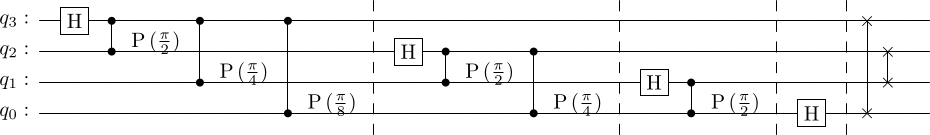

In [12]:
# Creamos un circuito cuántico con 4 qubits
qreg = QuantumRegister(4, name='q')
circ = QuantumCircuit(qreg)

# Definimos la transformada cuántica de Fourier para 4 qubits
def qft_4(circuit):
    n = 4
    for i in range(n):
        circuit.h(n-i-1)
        for j in range(i+1, n):
            circuit.cp(np.pi / 2**(j-i), n-j-1, n-i-1)
        circuit.barrier()
    
    # Swap qubits to reverse the order
    for i in range(n//2):
        circuit.swap(i, n-i-1)
    
    return circuit

# Aplicamos la transformada cuántica de Fourier a los 4 qubits
qft_4(circ)

# Dibuja el circuito
circ.draw(output='latex', reverse_bits=True)


## Circuito general de la QFT
El circuito que implementa la Transformada Cuántica de Fourier (QFT) para cualquier cantidad de qubits, se puede observar en el siguiente código. En este caso, se utiliza un enfoque recursivo para construir de manera eficiente los conjuntos de puertas correspondientes a cada qubit.

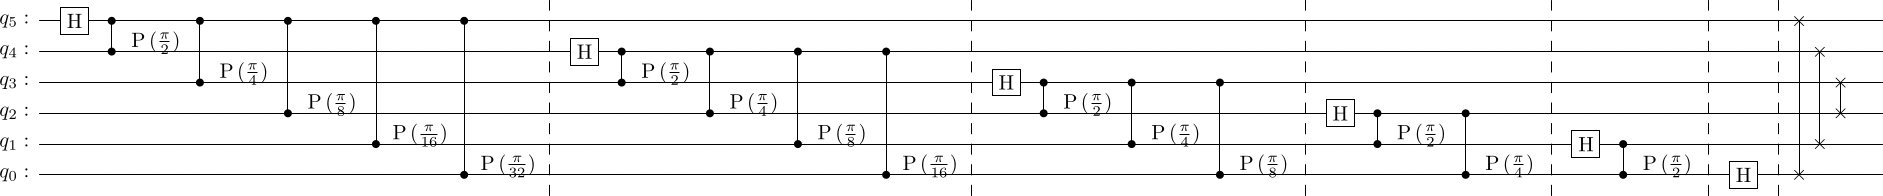

In [13]:
def qft(circuit, n):
    for i in range(n):
        circuit.h(n-i-1)
        for j in range(i+1, n):
            circuit.cp(np.pi / 2**(j-i), n-j-1, n-i-1)
        circuit.barrier()
        
    for i in range(n//2):
        circuit.swap(i, n-i-1)
    
    return circuit

# Hacemos un circuito cuántico con 6 qubits
n = 6  # Number of qubits
qreg = QuantumRegister(n, name='q')
circ = QuantumCircuit(qreg)

# Aplicamos la transformada cuántica de Fourier a los 6 qubits
qft(circ, n)

# Dibujamos el circuito
circ.draw(output='latex', reverse_bits=True)

## Creando estados cuánticos periódicos

Se construyen tres circuitos cuánticos de 4 qubits, cada uno diseñado para generar un estado cuántico con distinta periodicidad en la fase del registro cuántico

In [14]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile, assemble
import numpy as np

def crear_señal(which_signal):
    #creamos un registro cuántico donde almacenaremos una señal periódica A, B o C
    #codificamos esa periodicidad en la fase de los qbits del registro
    signal = QuantumRegister(4, name='signal')
    qc = QuantumCircuit(signal)

    ## preparamos las señales
    qc.h(signal);
    if which_signal == 'A':
        qc.rz(math.radians(180), signal[0]);
    elif which_signal == 'B':
        qc.rz(math.radians(-90), signal[0])
        qc.rz(math.radians(180), signal[1])
    elif which_signal == 'C':
        qc.rz(math.radians(-45), signal[0])
        qc.rz(math.radians(-90), signal[1])
        qc.rz(math.radians(180), signal[2])

    qc.barrier()
    return qc
#display(qc.draw(output='mpl'))  # Visualizar con Matplotlib

In [15]:
#Probar con señal A (se repite 8 veces, señal B se repite 4, señal C se repite 2 veces
circ=crear_señal('A')
circ.draw()

backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()

outputstate = result.get_statevector(circ, decimals=3)
display(array_to_latex(outputstate))

for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probabilidad = {}%'.format(i, amp, round(prob * 100, 5)))

<IPython.core.display.Latex object>

|0> -0.25j probabilidad = 6.25%
|1> 0.25j probabilidad = 6.25%
|2> -0.25j probabilidad = 6.25%
|3> 0.25j probabilidad = 6.25%
|4> -0.25j probabilidad = 6.25%
|5> 0.25j probabilidad = 6.25%
|6> -0.25j probabilidad = 6.25%
|7> 0.25j probabilidad = 6.25%
|8> -0.25j probabilidad = 6.25%
|9> 0.25j probabilidad = 6.25%
|10> -0.25j probabilidad = 6.25%
|11> 0.25j probabilidad = 6.25%
|12> -0.25j probabilidad = 6.25%
|13> 0.25j probabilidad = 6.25%
|14> -0.25j probabilidad = 6.25%
|15> 0.25j probabilidad = 6.25%


##Aplicación de la QFT para determinar la frecuencia de repetición de un estado cuántico

### EJERCICIO

Utiliza la QFT y calcula el periodo de los tres estados cuánticos creados en el apartado anterior

In [16]:
sigA = crear_señal('A')
# aplicamos la transformada cuántica de Fourier a la señal A
sigA = qft(sigA, 4)
# Dibujamos el circuito
sigA.draw(output='latex', reverse_bits=True)

backend = Aer.get_backend('statevector_simulator')
job = backend.run(sigA)
result = job.result()

outputstate = result.get_statevector(sigA, decimals=3)

for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probabilidad = {}%'.format(i, amp, round(prob * 100, 5)))

|8> (-0-1j) probabilidad = 100.0%


In [17]:
sigB = crear_señal('B')
# aplicamos la transformada cuántica de Fourier a la señal B
sigB = qft(sigB, 4)
# Dibujamos el circuito
sigB.draw(output='latex', reverse_bits=True)

backend = Aer.get_backend('statevector_simulator')
job = backend.run(sigB)
result = job.result()

outputstate = result.get_statevector(sigB, decimals=3)

for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probabilidad = {}%'.format(i, amp, round(prob * 100, 5)))

|4> (0.707-0.707j) probabilidad = 99.9698%


In [18]:
sigC = crear_señal('C')
# aplicamos la transformada cuántica de Fourier a la señal C
sigC = qft(sigC, 4)
# Dibujamos el circuito
sigC.draw(output='latex', reverse_bits=True)

backend = Aer.get_backend('statevector_simulator')
job = backend.run(sigC)
result = job.result()

outputstate = result.get_statevector(sigC, decimals=3)

for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probabilidad = {}%'.format(i, amp, round(prob * 100, 5)))

|2> (0.924-0.383j) probabilidad = 100.0465%


## La QFT inversa

La transformada de Fourier inversa nos permite generar un estado cuántico con un patrón específico de periodicidades o frecuencias en sus amplitudes.

Podemos implementarla de una forma sencilla con el metodo ```.inverse()``` de la clase ```QuantumCircuit```

In [19]:
def inverse_qft(circuit, n):
    """Funcion que implementa la QFT inversa para los n primeros bits de un circuito cuantico"""
    # Creamos el circuito de n bits
    qft_circ = qft(QuantumCircuit(n), n)
    # Calculamos el circuito inverso
    invqft_circ = qft_circ.inverse()
    # lo añadimos al circuito creado
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit

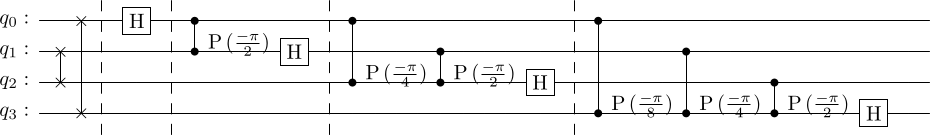

In [20]:
circ = QuantumCircuit(4)
inverse_qft(circ,4)
circ.decompose().draw(output='latex')   # .decompose() para verlo con puertas individuales

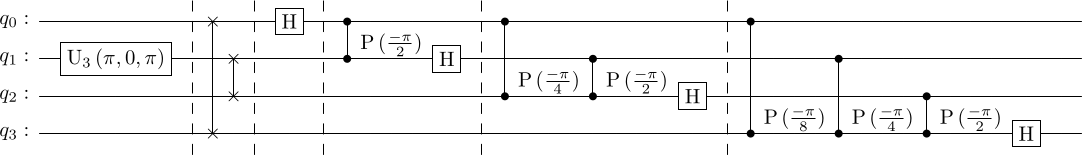

|0> (0.25-0j) probability = 6.25%
|1> (0.177-0.177j) probability = 6.2658%
|2> (-0-0.25j) probability = 6.25%
|3> (-0.177-0.177j) probability = 6.2658%
|4> (-0.25+0j) probability = 6.25%
|5> (-0.177+0.177j) probability = 6.2658%
|6> 0.25j probability = 6.25%
|7> (0.177+0.177j) probability = 6.2658%
|8> (0.25-0j) probability = 6.25%
|9> (0.177-0.177j) probability = 6.2658%
|10> (-0-0.25j) probability = 6.25%
|11> (-0.177-0.177j) probability = 6.2658%
|12> (-0.25+0j) probability = 6.25%
|13> (-0.177+0.177j) probability = 6.2658%
|14> 0.25j probability = 6.25%
|15> (0.177+0.177j) probability = 6.2658%


In [21]:
#De una frecuencia obtener un estado con esa frecuencia

#Preparamos el circuito
circ = QuantumCircuit(4)

#Ppreparamos la frecuencia |2> = |0010>  con la notacion |q3q2q1q0>
circ.x(1)
circ.barrier()

inverse_qft(circ,4)
display(circ.decompose().draw(output='latex'))

backend = Aer.get_backend('statevector_simulator')
#qc = transpile(qc, simulator)  #opcional

#Lanzamos las ejecuciones y obtenemos los resultados
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()

outputstate = result.get_statevector(circ, decimals=3)

for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))


### EJERCICIO

Calcula la QFT de la QFT inversa del ejercicio anterior y verifica que la frecuencia resultante coincide con la inicial

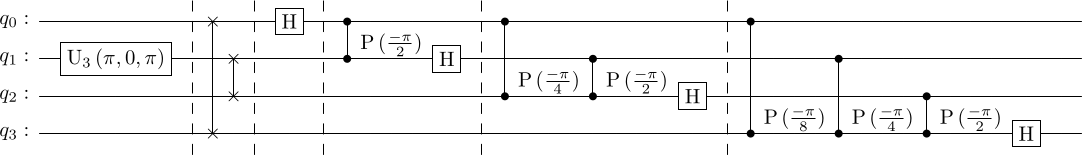

|2> (1-0j) probability = 100.0%


In [22]:
#De una frecuencia obtener un estado con esa frecuencia

#Preparamos el circuito
circ = QuantumCircuit(4)


#Ppreparamos la frecuencia |2> = |0010>  con la notacion |q3q2q1q0>
circ.x(1)
circ.barrier()

####CALCULAMOS LA QFT INVERSA
inverse_qft(circ,4)
display(circ.decompose().draw(output='latex'))

####CALCULAMOS LA QFT DEL CIRCUITO
qft(circ,4)

###EJECUCION EN SIMULADOR
backend = Aer.get_backend('statevector_simulator')

#Lanzamos las ejecuciones y obtenemos los resultados
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()

outputstate = result.get_statevector(circ, decimals=3)

for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))


## Ejecución en un Simulador con ruido

### EJERCICIO

Crear una señal, calcular su QFT y ejecutarla en un simulador con y sin ruido

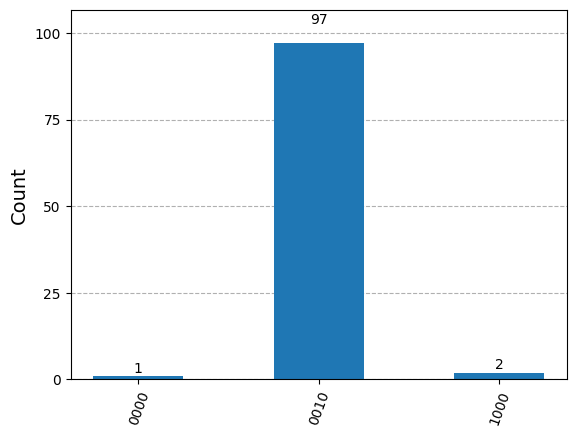

In [ ]:
##crear el circuito con una señal y calcular su QFT
#Probar con señal A (se repite 8 veces, señal B se repite 4, señal C se repite 2 veces
s='C' #señal
n=4 #qubits

# Creamos el circuito cuántico
circ=crear_señal(s)

# Aplicamos la transformada cuántica de Fourier a la señal
qft(circ,n)
circ.measure_all()

##SIN RUIDO
# crea el simulador
backend = Aer.get_backend('statevector_simulator')
# Transpilamos el circuito para mapearlo a las puertas sin ruido
transpiled_circuit = transpile(circ, backend=backend)
job = backend.run(transpiled_circuit, shots=100)
result_no_noise = job.result()

##CON RUIDO
# Cogemos un backend ruidoso ficticio
backend = GenericBackendV2(num_qubits=n)
# Transpilamos el circuito para mapearlo a las puertas con ruido
transpiled_circuit2 = transpile(circ, backend=backend)
job = backend.run(transpiled_circuit2, shots=100)
result_with_noise = job.result()

counts_no_noise = result_no_noise.get_counts()
counts_with_noise = result_with_noise.get_counts()

plot_histogram(counts_no_noise)
plot_histogram(counts_with_noise)


## Ejecución en HW cuantico real

### EJERCICIO

Crear una señal, calcular su QFT y ejecutarla en un dispositivo cuántico real

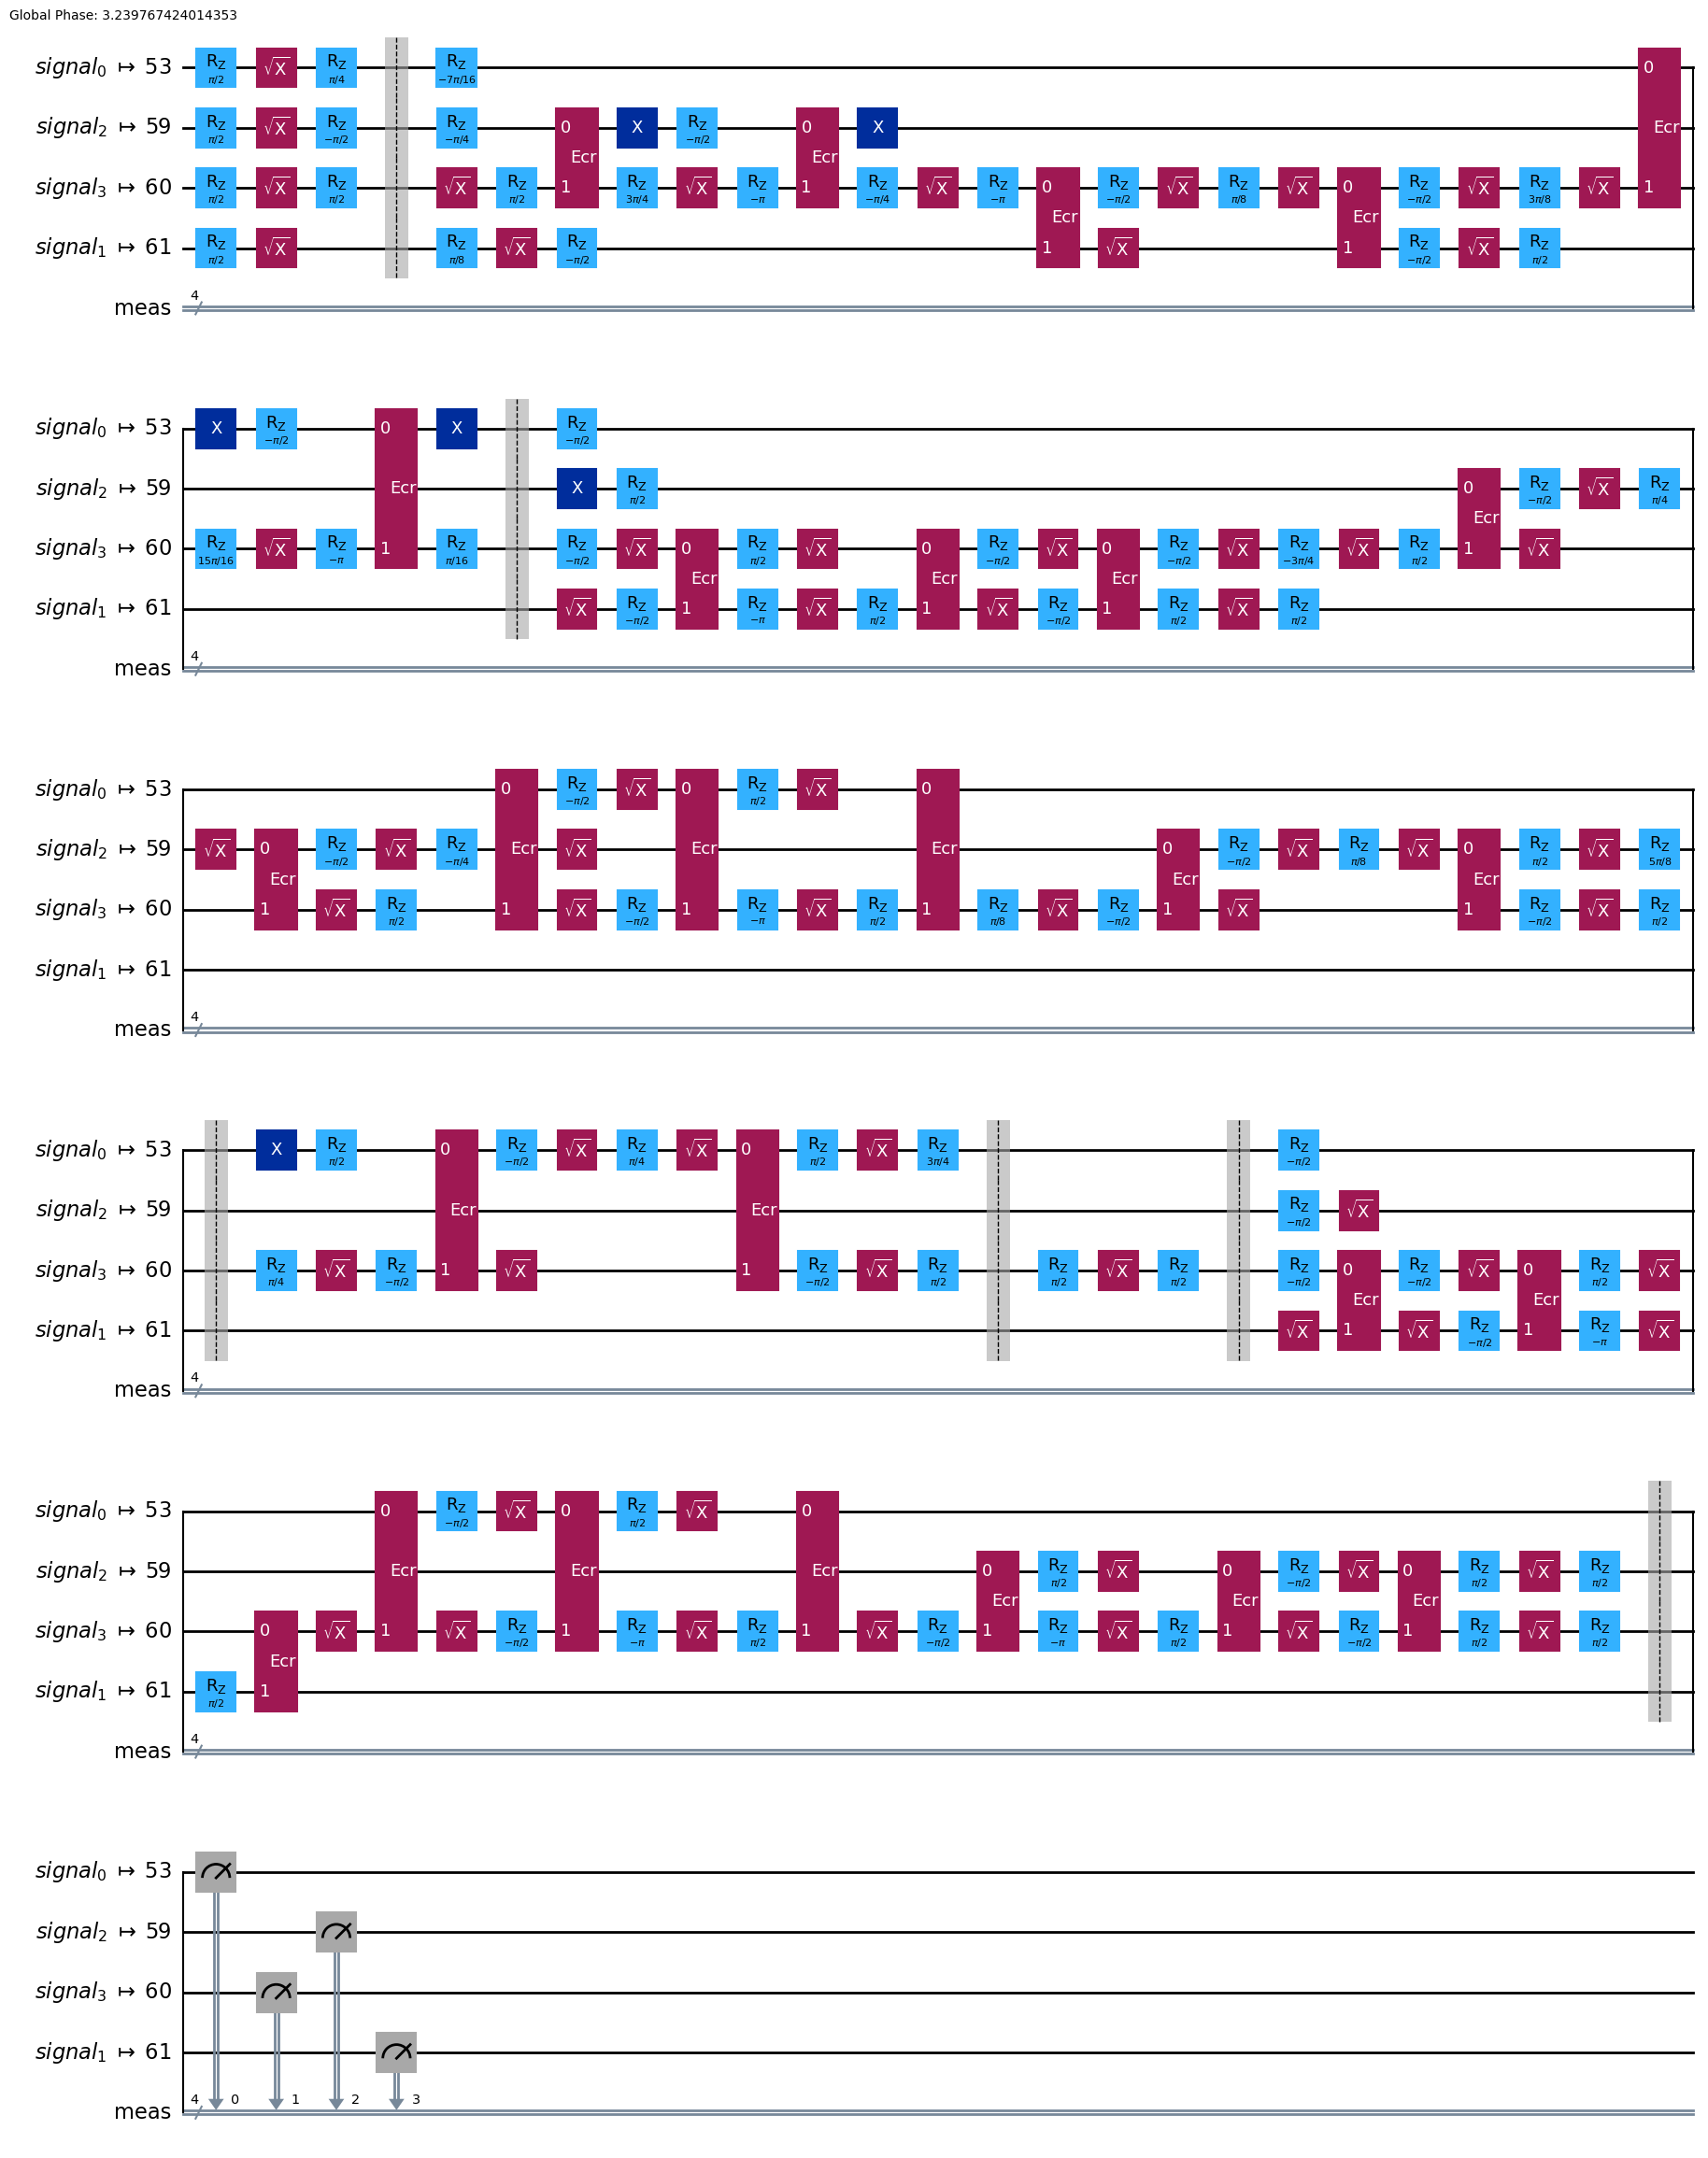

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

#Probar con señal A (se repite 8 veces, señal B se repite 4, señal C se repite 2 veces
s='C' #señal
n= 4 #qubits

# Creamos el circuito
circ=crear_señal(s)
# Aplicamos la transformada cuántica de Fourier a la señal
qft(circ,n)

# Medimos los qubits
circ.measure_all()

# Auth token for IBM Quantum
token = ""

# Ejecutamos en un backend real
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

backend = service.least_busy(simulator=False, operational=True)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ)

isa_circuit.draw("mpl", idle_wires=False)

In [29]:
#ejecutar el job
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: czjsrv37m0r0008wfms0
PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=100, num_bits=4>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-03-27 18:44:00', stop='2025-03-27 18:44:01', size=100>)])}, 'version': 2})


Una vez ejecutado el job recuperamos los resultados de la ejecucion y visualizamos los resultados

{'1011': 1, '0011': 21, '0001': 7, '0101': 5, '0010': 37, '0000': 16, '0100': 3, '1000': 1, '1111': 2, '0111': 1, '1010': 3, '1100': 2, '1110': 1}


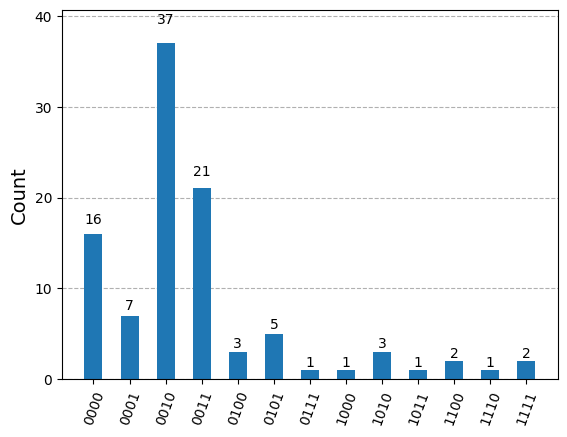

In [30]:
# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))